In [1]:
import pandas as pd
from darts import TimeSeries

In [2]:
df = pd.read_csv("MY3_May_2023_KNN_Imputed.csv")

df

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,2022-07-03 20:30:00,2.200000e+01,8.871990,0.000000,398.496241,3.636364,26.00000,71.000000,45.666667,55.000000
1,2022-07-03 20:45:00,6.700000e+01,3.802281,0.000000,229.323308,0.000000,25.00000,62.000000,44.666667,53.333333
2,2022-07-03 21:00:00,1.120000e+02,12.674271,0.000000,184.210526,0.000000,25.00000,60.000000,43.666667,52.750000
3,2022-07-03 21:15:00,1.560000e+02,16.476553,0.000000,165.413534,0.000000,24.00000,59.666667,43.333333,52.666667
4,2022-07-03 21:30:00,5.307278e+05,321.540266,190.816359,794.429588,371.997558,27.25921,61.186420,18.749892,20.904609
...,...,...,...,...,...,...,...,...,...,...
28042,2023-04-21 23:00:00,1.061851e+06,397.944200,225.108225,700.960219,489.898990,29.00000,69.000000,27.666667,29.000000
28043,2023-04-21 23:15:00,1.061896e+06,392.070485,225.974026,707.818930,492.424242,29.00000,69.000000,31.666667,36.000000
28044,2023-04-21 23:30:00,1.061941e+06,393.538913,225.974026,716.049383,493.686869,29.00000,70.000000,33.333333,39.333333
28045,2023-04-21 23:45:00,1.061986e+06,392.070485,225.108225,727.023320,488.636364,29.00000,70.000000,35.333333,42.666667


In [3]:
df1 = df
df1['Datetime'] = pd.to_datetime(df['Datetime'])

df1 = df.set_index('Datetime')
#df1
df2=df1.resample('1H').mean()
df2.reset_index(inplace = True)
df2

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,2022-07-03 20:00:00,4.450000e+01,6.337136,0.000000,313.909774,1.818182,25.500000,66.500000,45.166667,54.166667
1,2022-07-03 21:00:00,2.654309e+05,168.057839,95.408180,484.620809,185.998779,25.879605,60.509877,31.124946,36.806471
2,2022-07-03 22:00:00,5.307278e+05,321.540266,190.816359,794.429588,371.997558,27.259210,61.186420,18.749892,20.904609
3,2022-07-03 23:00:00,5.307278e+05,321.540266,190.816359,794.429588,371.997558,27.259210,61.186420,18.749892,20.904609
4,2022-07-04 00:00:00,5.307278e+05,321.540266,190.816359,794.429588,371.997558,27.259210,61.186420,18.749892,20.904609
...,...,...,...,...,...,...,...,...,...,...
7008,2023-04-21 20:00:00,1.061380e+06,395.374449,224.242424,685.528121,498.737374,30.000000,68.500000,22.833333,23.916667
7009,2023-04-21 21:00:00,1.061558e+06,396.475771,225.757576,692.386831,496.527778,29.750000,69.000000,25.500000,27.250000
7010,2023-04-21 22:00:00,1.061738e+06,393.538913,227.056277,710.562414,493.686869,29.000000,69.000000,31.000000,34.833333
7011,2023-04-21 23:00:00,1.061918e+06,393.906021,225.541126,712.962963,491.161616,29.000000,69.500000,32.000000,36.750000


In [4]:
testl = 24*7
trainl = len(df2) - testl
df3 = df2.set_index('Datetime')

df_train = df3[:trainl]
df_test = df3[trainl-24:trainl+testl]

In [5]:
targets = ['field1','field2','field3','field4','field7','field8']
covariates = ['field5','field6']

X_train_df = df_train[covariates]
Y_train_df = df_train[targets]

X_test_df = df_test[covariates]
Y_test_df = df_test[targets]

In [6]:
X_train = TimeSeries.from_dataframe(X_train_df)
Y_train = TimeSeries.from_dataframe(Y_train_df)

X_test = TimeSeries.from_dataframe(X_test_df)
Y_test = TimeSeries.from_dataframe(Y_test_df)

In [7]:
from darts.models import RandomForest
# import warnings
# warnings.filterwarnings("ignore")

n = len(Y_test)

# Initialize the Random Forest
modelrf = RandomForest(lags=24, lags_past_covariates=24, output_chunk_length=24 )

# Train the model on the training data
modelrf.fit(Y_train, past_covariates=X_train)


RandomForest(lags=24, lags_past_covariates=24, lags_future_covariates=None, output_chunk_length=24, add_encoders=None, n_estimators=100, max_depth=None, multi_models=True, use_static_covariates=True)

In [8]:
predrf1 = modelrf.predict(n, past_covariates = X_test)

predictions = TimeSeries.pd_dataframe(predrf1)
predictions

component,field1,field2,field3,field4,field7,field8
Datetime,,,,,,
2023-04-15 01:00:00,236.141703,130.982684,802.767490,278.532197,38.575000,45.876667
2023-04-15 02:00:00,235.477239,130.352814,801.495199,275.868056,38.603333,46.006667
2023-04-15 03:00:00,235.914097,131.017316,798.281893,273.184975,39.131667,46.762500
2023-04-15 04:00:00,235.543319,130.889610,786.834705,270.056818,39.183333,46.855833
2023-04-15 05:00:00,234.941263,130.294372,770.421811,266.496212,39.240833,47.030000
...,...,...,...,...,...,...
2023-04-22 20:00:00,236.805711,131.799938,660.396285,272.839294,21.512082,23.144046
2023-04-22 21:00:00,237.011291,132.096475,659.247451,273.101289,22.365832,24.210713
2023-04-22 22:00:00,236.684566,131.776129,660.313980,271.286263,23.170832,25.112379


In [9]:
from darts.metrics import rmse, mae, mape


# Convert actual and predicted values to TimeSeries
actual_series_list = [TimeSeries.from_dataframe(Y_test_df[[target]]) for target in targets]
predicted_series_list = [TimeSeries.from_dataframe(predictions[[target]]) for target in targets]

# Calculate RMSE and MAE for each target field
rmse_values = []
mae_values = []
mape_values = []

for actual, predicted in zip(actual_series_list, predicted_series_list):
    rmse_value = rmse(actual, predicted)
    mae_value = mae(actual, predicted)
    mape_value = mape(actual, predicted)
    rmse_values.append(rmse_value)
    mae_values.append(mae_value)
    mape_values.append(mape_value)

# Create a DataFrame to store the results for RANDOM FOREST
results_df = pd.DataFrame({
    'Field': targets,
    'RMSE_RF': rmse_values,
    'MAE_RF': mae_values,
    'MAPE_RF': mape_values
})

# Save the LightGBM results to a CSV file
results_df.to_csv('RF_multi_results_1.csv', index=False)

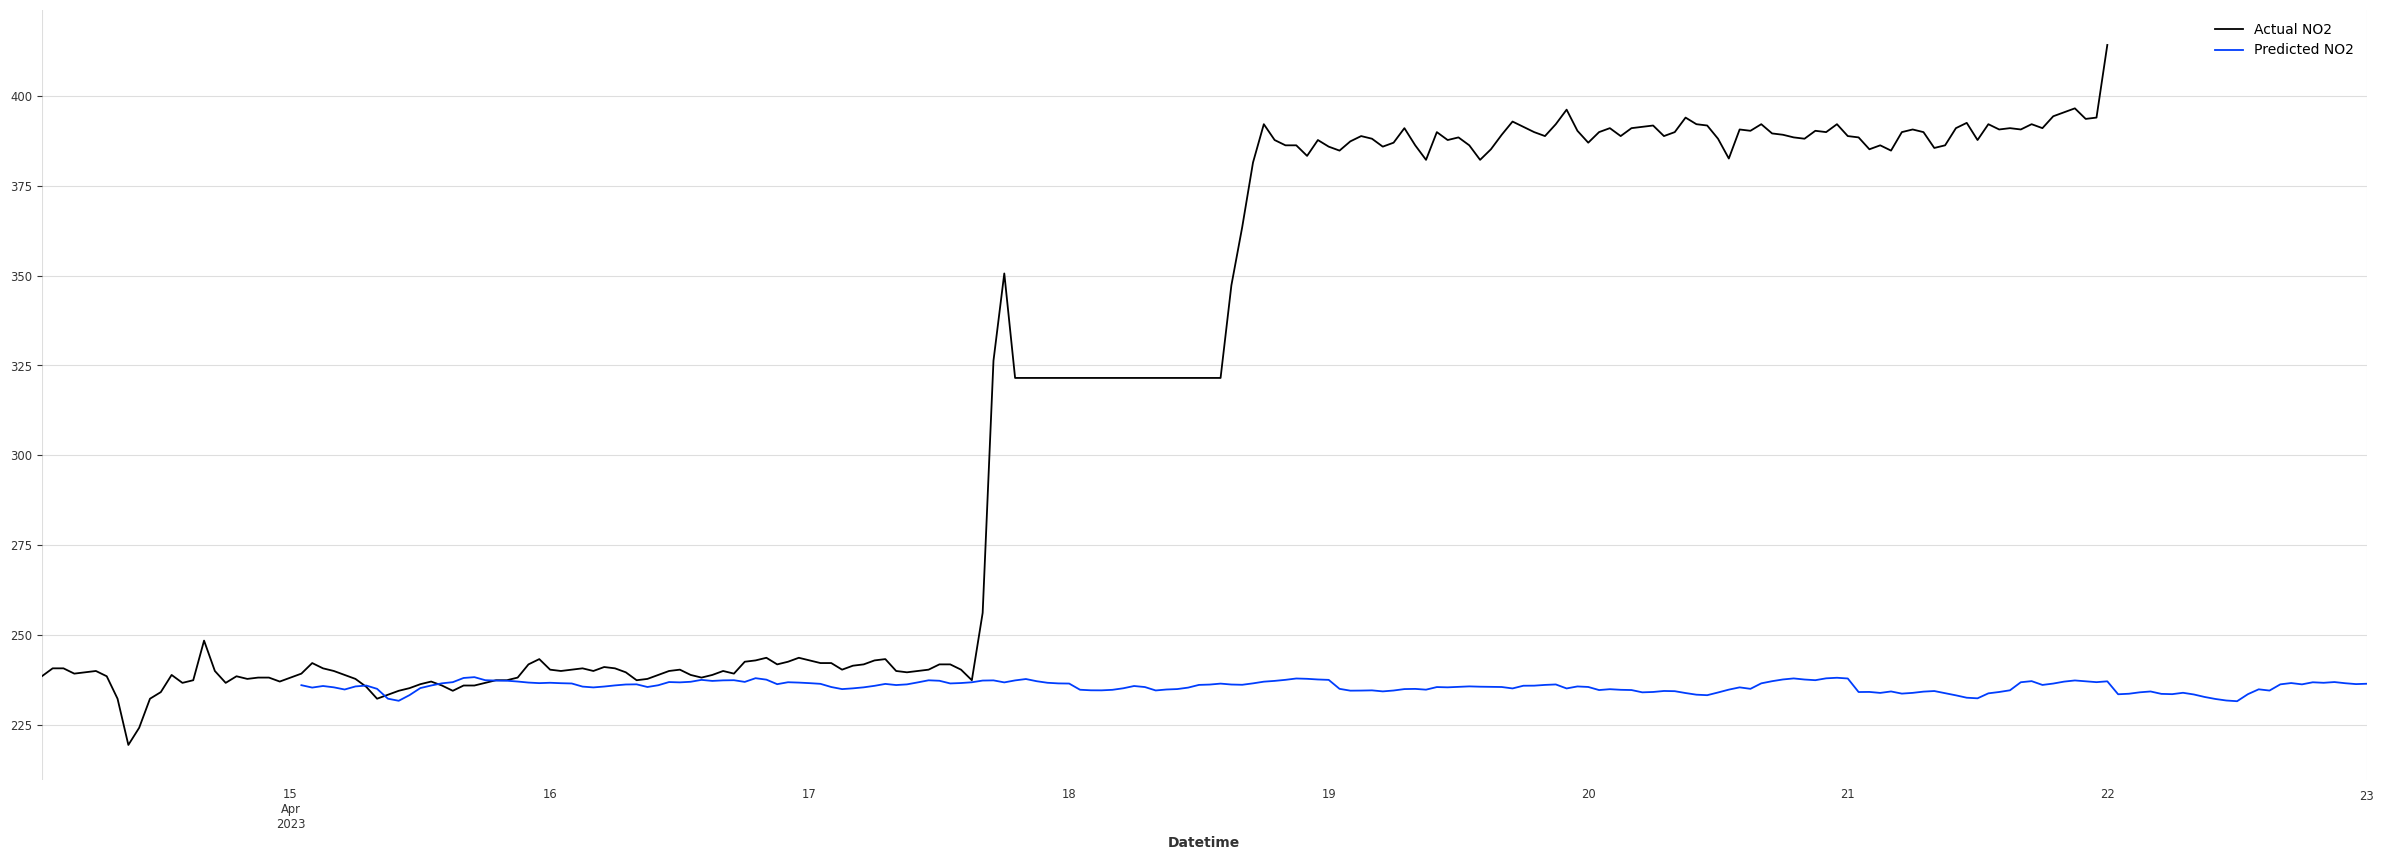

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
Y_test_df['field1'].plot(label='Actual NO2')
predictions['field1'].plot(label='Predicted NO2')
plt.legend()
plt.show()

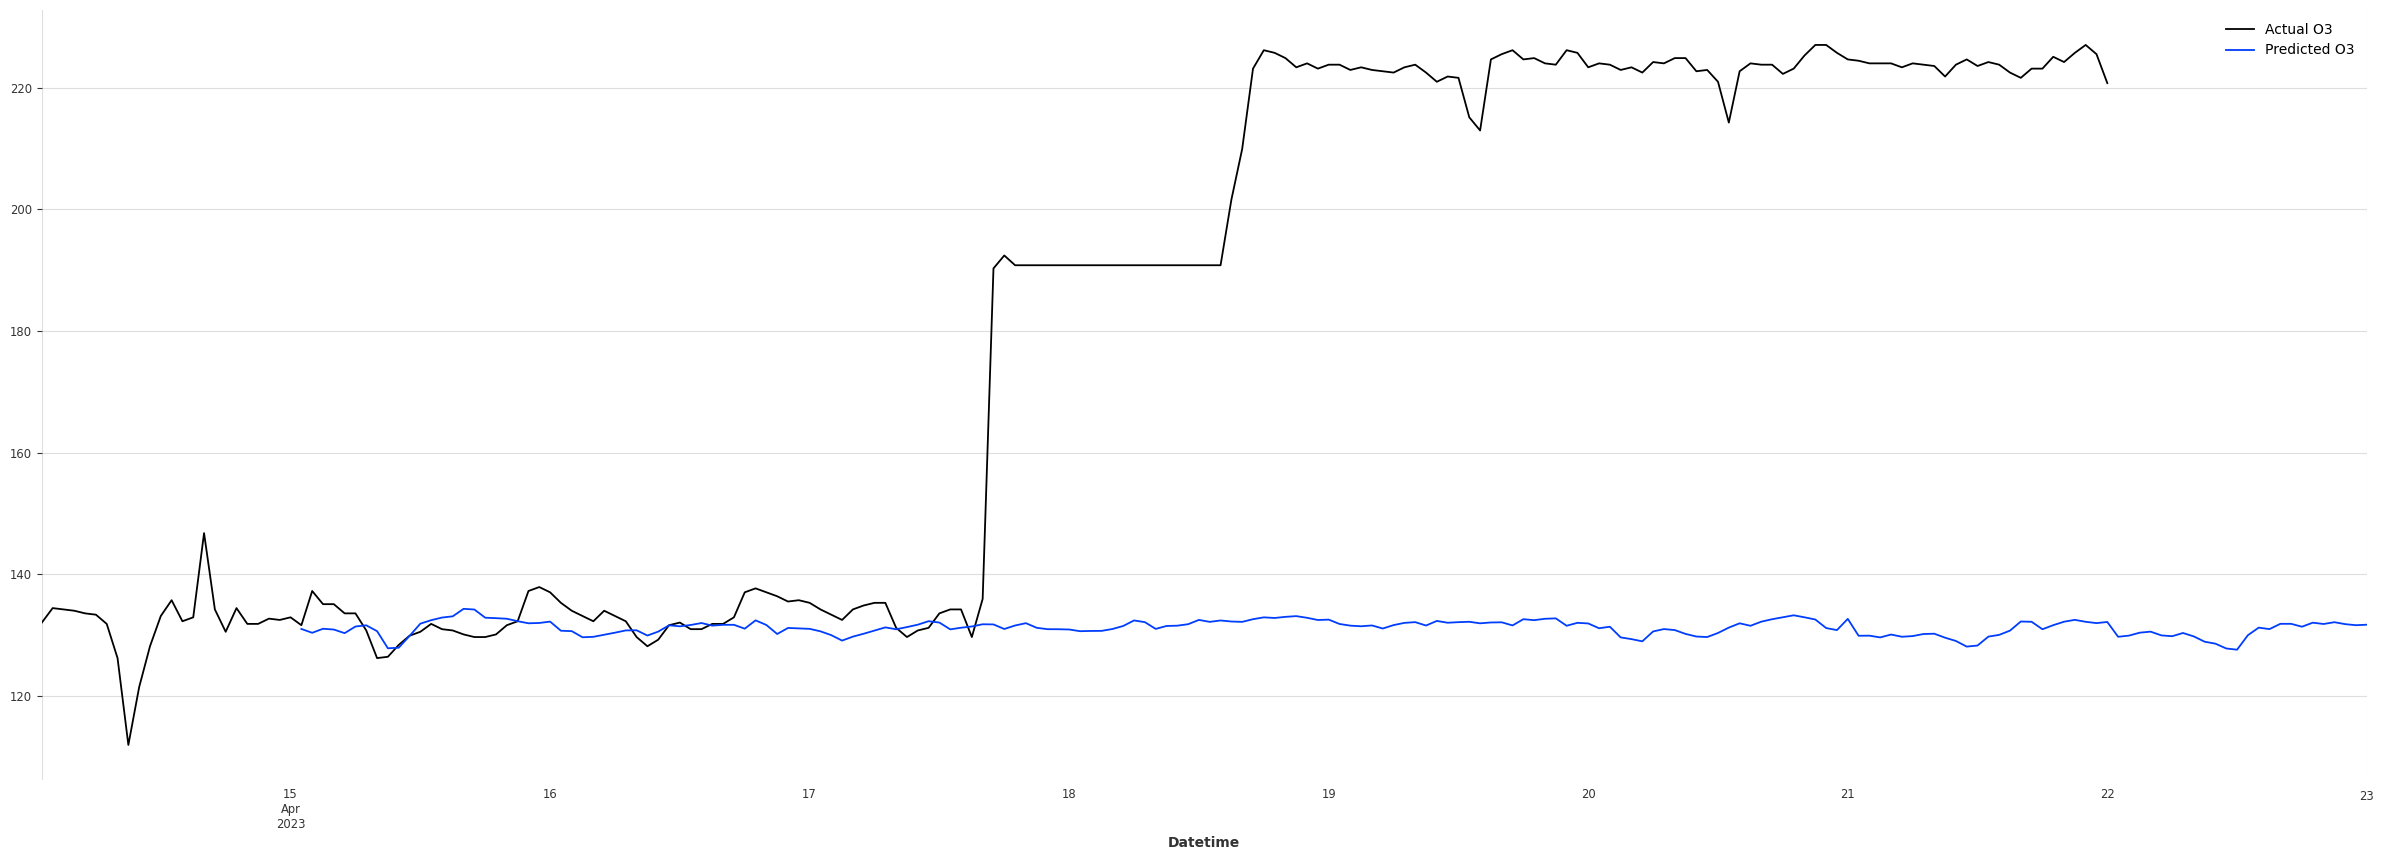

In [11]:
plt.figure(figsize=(30,10))
Y_test_df['field2'].plot(label='Actual O3')
predictions['field2'].plot(label='Predicted O3')
plt.legend()
plt.show()

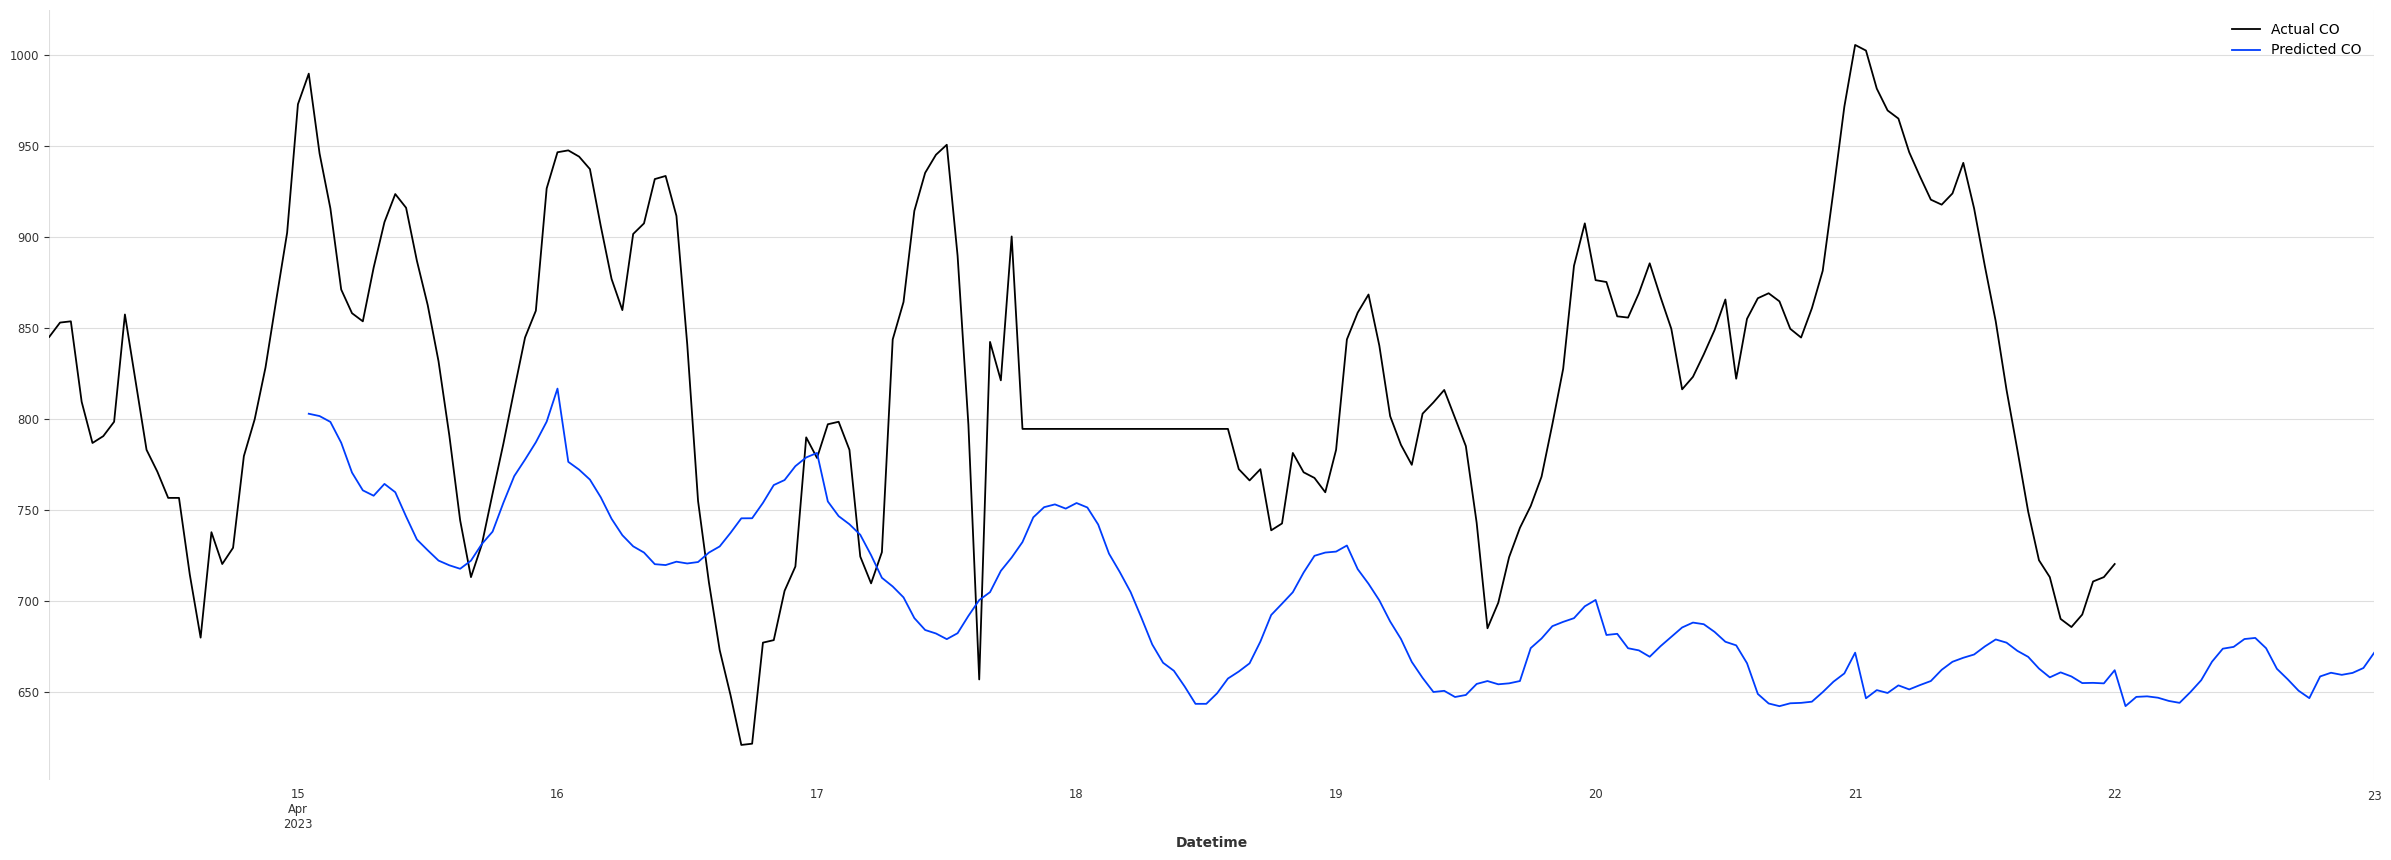

In [12]:
plt.figure(figsize=(30,10))
Y_test_df['field3'].plot(label='Actual CO')
predictions['field3'].plot(label='Predicted CO')
plt.legend()
plt.show()

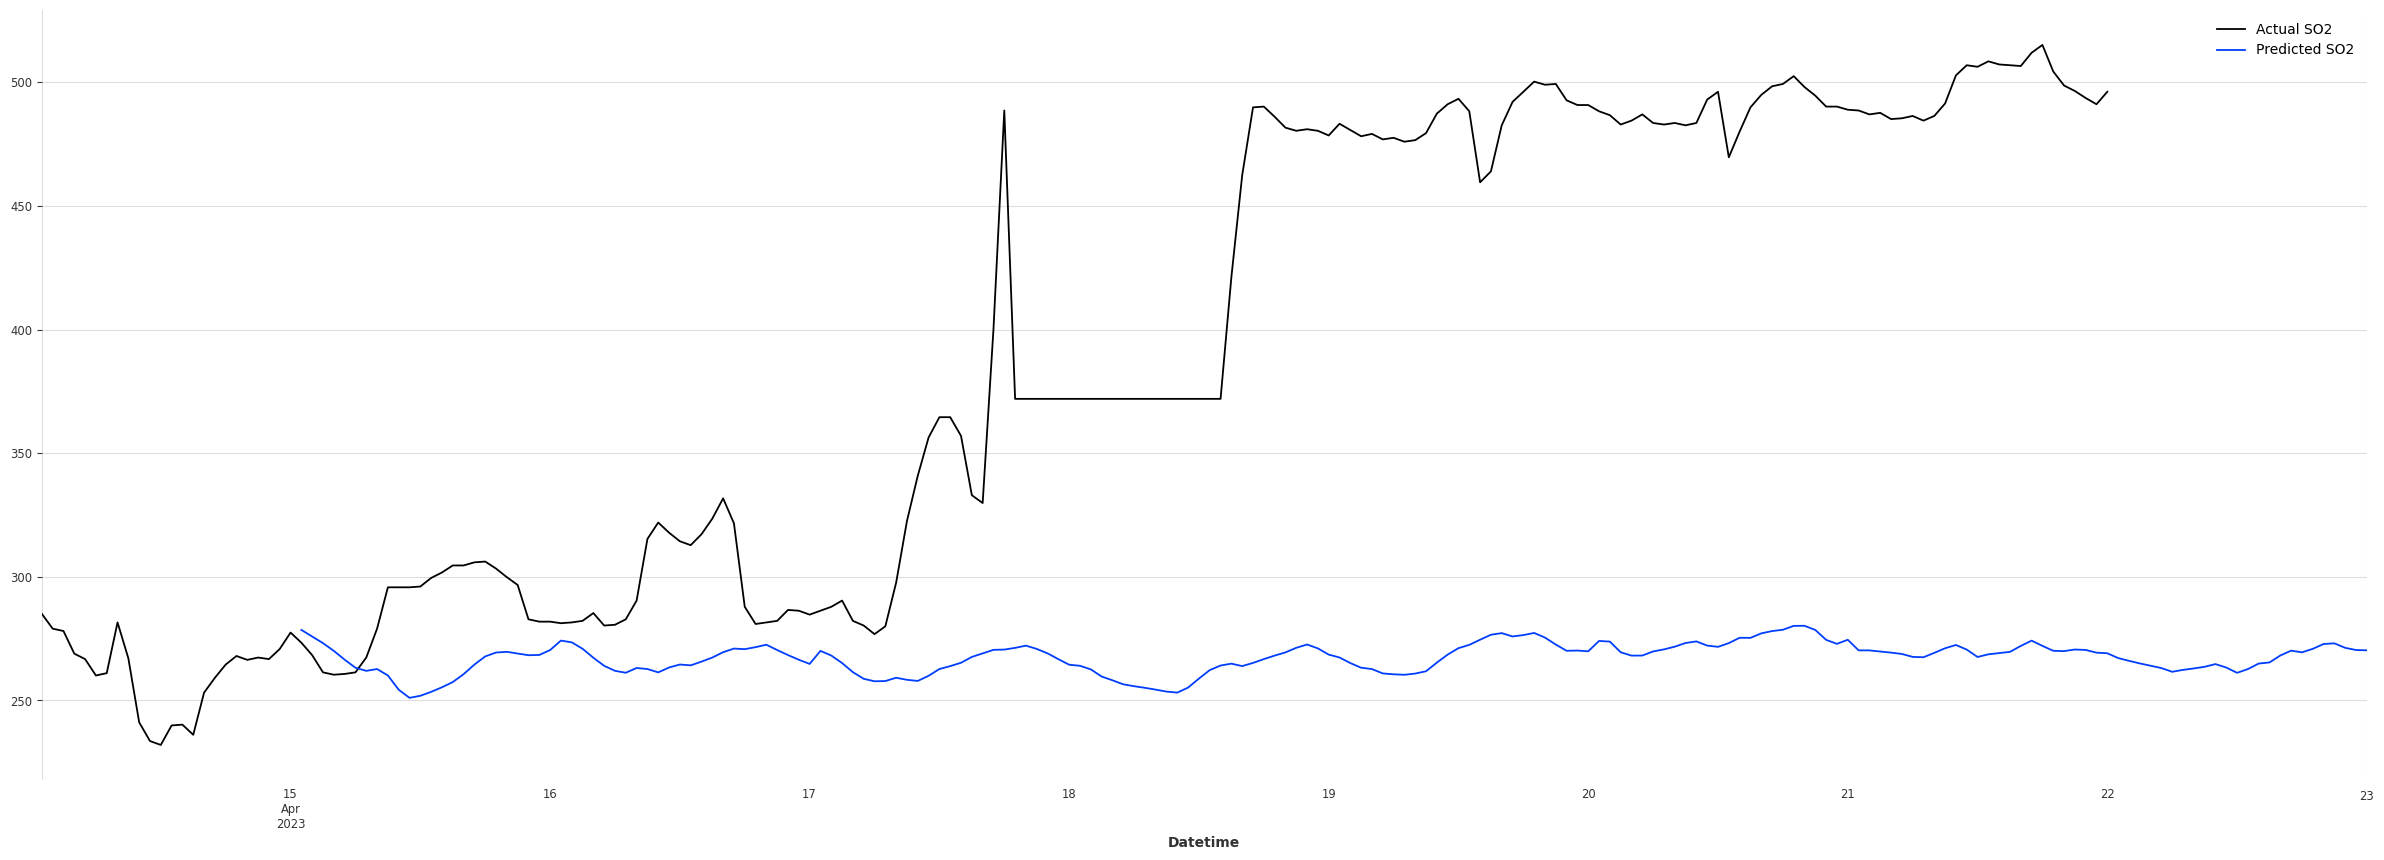

In [13]:
plt.figure(figsize=(30,10))
Y_test_df['field4'].plot(label='Actual SO2')
predictions['field4'].plot(label='Predicted SO2')
plt.legend()
plt.show()

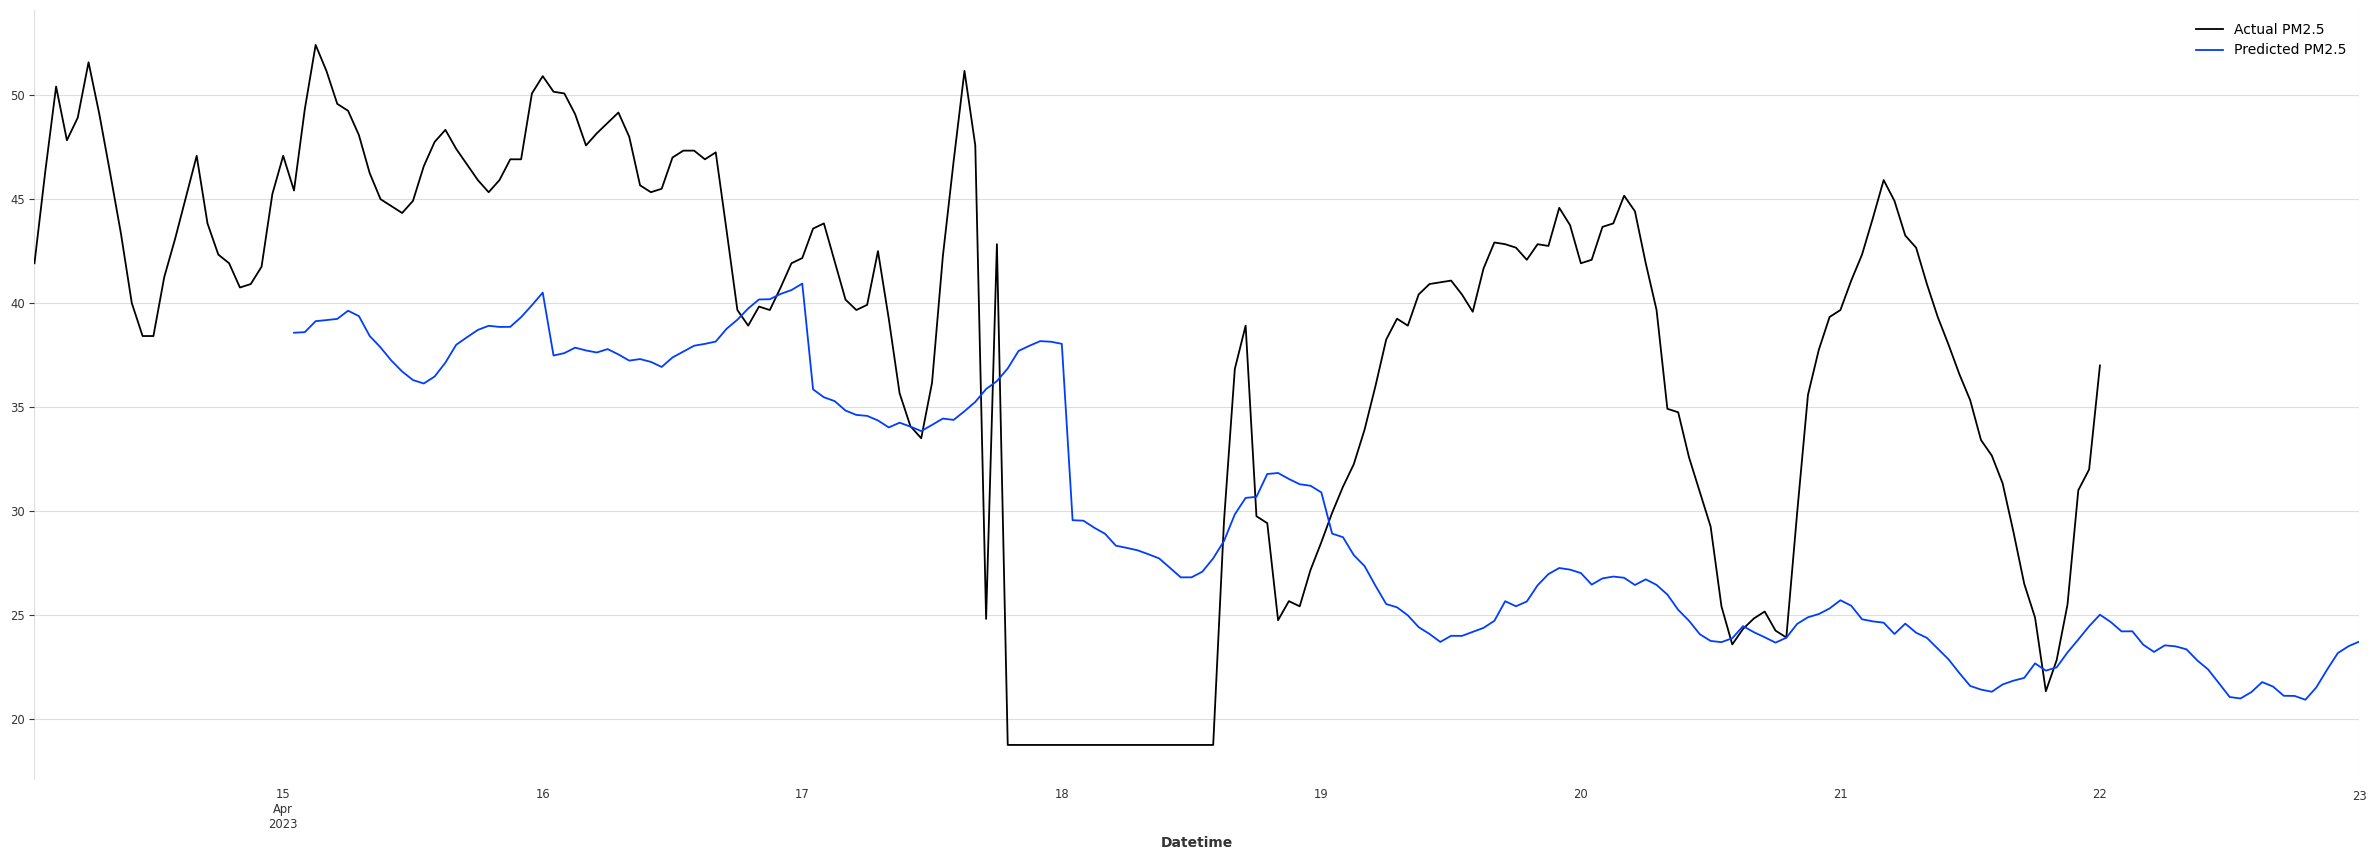

In [14]:
plt.figure(figsize=(30,10))
Y_test_df['field7'].plot(label='Actual PM2.5')
predictions['field7'].plot(label='Predicted PM2.5')
plt.legend()
plt.show()

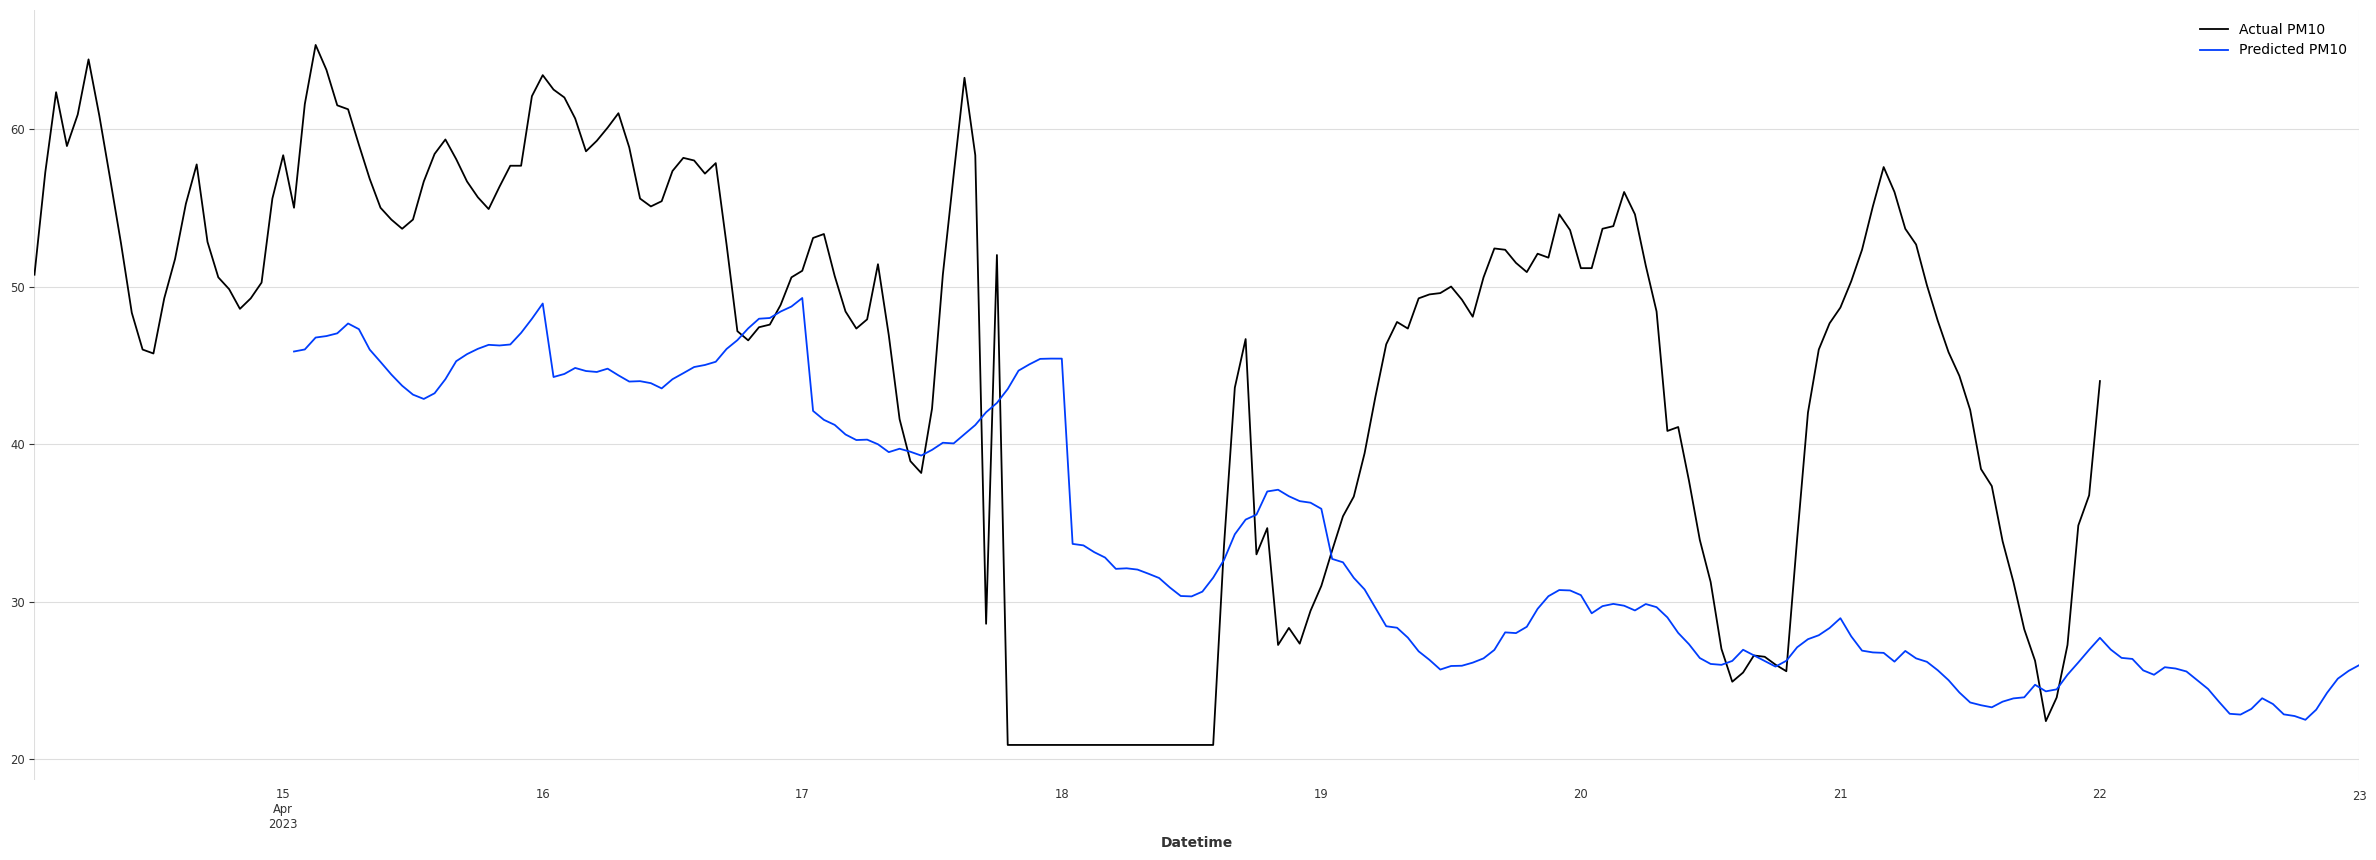

In [15]:
plt.figure(figsize=(30,10))
Y_test_df['field8'].plot(label='Actual PM10')
predictions['field8'].plot(label='Predicted PM10')
plt.legend()
plt.show()